In [10]:
import pandas as pd

data = pd.read_csv('parkinsons.csv')
data

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,target
0,0.815695,-0.682509,-1.632090,0.082905,-0.284242,0.327453,-0.028637,0.328505,-0.324594,-0.351642,-0.209709,-0.423356,-0.543466,-0.209704,-0.298721,-0.009205,-1.214066,-1.478500,-0.650658,34.398
1,0.815695,-0.682509,-1.500676,-0.560793,-0.756723,-0.533746,-0.476212,-0.534825,-0.534016,-0.573156,-0.545158,-0.565592,-0.529955,-0.545153,-0.351965,1.282650,-1.055119,-1.247880,-1.218585,34.894
2,0.815695,-0.682509,-1.369410,-0.238944,-0.539382,-0.300038,-0.320767,-0.298983,-0.669115,-0.564469,-0.741592,-0.702426,-0.645545,-0.741587,-0.199370,0.318711,-0.784860,-1.540139,-0.103280,35.389
3,0.815695,-0.682509,-1.257773,-0.155370,-0.485186,-0.344859,-0.170682,-0.344871,-0.423692,0.069668,-0.460540,-0.449763,-0.392849,-0.460787,-0.071754,0.644530,-0.536487,-1.062115,1.237075,35.810
4,0.815695,-0.682509,-1.108169,-0.498557,-0.663894,-0.658604,-0.529814,-0.659682,-0.658276,-0.586186,-0.783145,-0.651413,-0.464905,-0.783392,-0.343370,1.036305,-0.689195,-1.297953,-0.283954,36.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,-0.431361,-0.682509,0.934231,-0.372307,-0.358449,-0.421694,-0.427970,-0.422773,-0.583565,-0.655681,-0.561024,-0.528983,-0.600010,-0.560767,-0.116990,0.160696,0.997028,-1.411923,-0.064697,33.485
5871,-0.431361,-0.682509,1.066152,-0.566128,-0.537436,-0.575365,-0.484252,-0.574309,-0.421369,-0.416793,-0.501338,-0.442561,-0.422372,-0.501081,-0.338311,0.281189,-0.153430,-1.242097,-1.020641,32.988
5872,-0.431361,-0.682509,1.196763,-0.473663,-0.537158,-0.469717,-0.377049,-0.469728,-0.350143,-0.290834,-0.260328,-0.335135,-0.435882,-0.260576,-0.241573,0.789028,-0.629379,-1.048856,-0.852755,32.495
5873,-0.431361,-0.682509,1.326064,-0.594579,-0.658336,-0.546552,-0.473532,-0.547630,-0.743051,-0.781639,-0.772568,-0.686822,-0.721104,-0.772815,-0.404372,0.639170,0.269141,-1.269038,-0.847618,32.007


## 5.

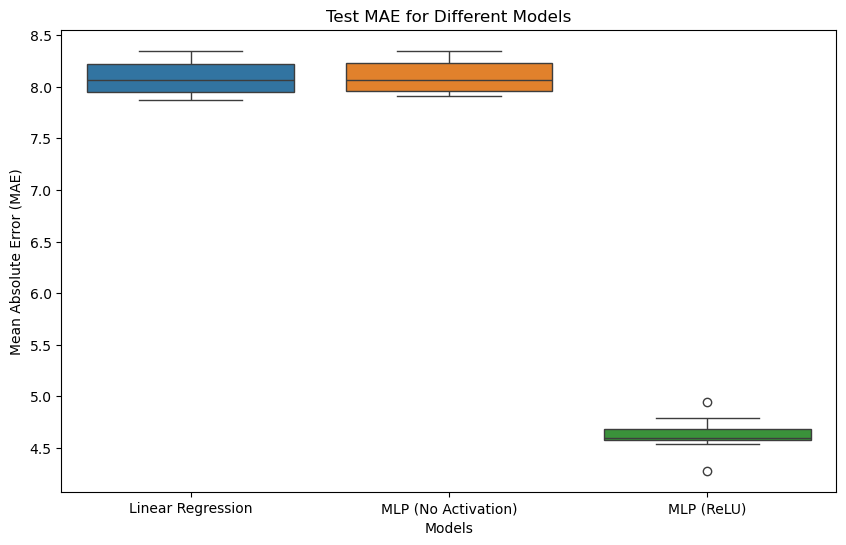

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

mae_lr = []
mae_mlp_no_activation = []
mae_mlp_relu = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i+1)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    mae_lr.append(mean_absolute_error(y_test, y_pred_lr))

    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_mlp_no_activation = mlp_no_activation.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_mlp_no_activation))

    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0, max_iter=1000)
    mlp_relu.fit(X_train, y_train)
    y_pred_mlp_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_mlp_relu))

results = pd.DataFrame({
    'Linear Regression': mae_lr,
    'MLP (No Activation)': mae_mlp_no_activation,
    'MLP (ReLU)': mae_mlp_relu
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title('Test MAE for Different Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Models')
plt.show()

## 6.

Numa regressão linear, o modelo assume uma relação linear entre as features de entrada e a variável target. Um MLP sem ativações comporta-se essencialmente como um modelo linear, já que cada layer passa a weighted sum sem realizar qualquer transformação. Observando o gráfico, vemos que corrobora a nossa tese, o boxplot MAE da 'Linear Regression' é praticamente igual ao do MLP sem ativações.  
Sem funções de ativação, as redes neuronais estariam limitadas a transformações lineares, tornando-as incapazes de aprender e modelar dados complexos. Ao introduzir não-linearidade, as funções de ativação permitem que as redes neuronais aproximem funções arbitrárias, tornando-as ferramentas poderosas para tarefas como o reconhecimento de imagens, o processamento de linguagem natural e muitas outras.  
Como podemos ver pelo boxplot, ao usar a função de ativação ReLu, o modelo apresentou um desempenho signficamente melhor, tendo-se ajustado melhor a estes dados.

## 7.

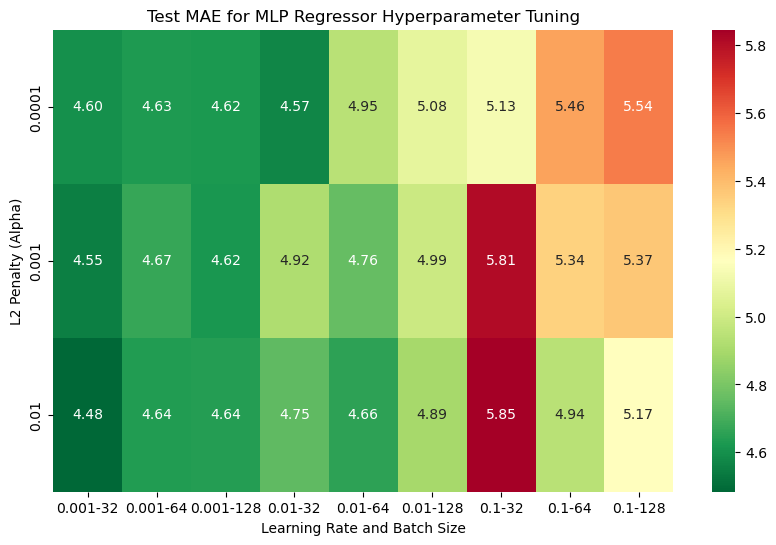

Best Hyperparameters: {'alpha': 0.01, 'batch_size': 32, 'learning_rate_init': 0.001}


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1500, random_state=0)

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [32, 64, 128]
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)

results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_score'] = -results['mean_test_score']

pivot_results = results.pivot_table(index='param_alpha', 
                                     columns=['param_learning_rate_init', 'param_batch_size'], 
                                     values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_results, annot=True, fmt=".2f", cmap='RdYlGn_r')
plt.title('Test MAE for MLP Regressor Hyperparameter Tuning')
plt.xlabel('Learning Rate and Batch Size')
plt.ylabel('L2 Penalty (Alpha)')
plt.show()


print(f"Best Hyperparameters: {best_params}")

Ao observarmos este mapa de calor, podemos começar por ver que à medida que o learning rate aumenta, o MAE também aumenta. Podemos ver isto fixando as outras duas variáveis (alpha e batch size), concluindo que o melhor valor de learning rate será o mínimo (0.001).  
Os valores de alpha podem produzir overfitting (valor baixo) ou underfitting (valor alto), dependendo da combinação.
Ao aumentar o batch size, geralmente é mais estável o treino, levando a valores de MAE mais baixos. Observando o gráfico, vemos que não parece haver problema quando a learning rate é baixa, começando-se a notar para learning rates de 0.01 e 0.1.